In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib notebook

# Aux imports
import numpy as np
import pandas as pn

In [51]:
# Create the geo_data object. We just choose the cropped extent

geo_data = gp.create_data(extent=[0, 10, 0,10, 0, 10], resolution=[40,40,40])

In [52]:
df = pn.DataFrame(data = {'X' : np.array([0, 10]),
                          'Y':  np.array([5, 5]) ,
                          'Z' : np.array([4, 6]),
                          'formation' : 'Default'})

gp.set_interfaces(geo_data, df)

In [53]:

geo_data.foliation_add(X= 5,
                       Y= 5,
                       Z= 5, dip = -11.61, azimuth=90., polarity=1., formation='Default',
                       series='Default serie', order_series=1, isFault=False)

geo_data.set_series()
geo_data._set_formations()
geo_data.calculate_gradient()

In [54]:
gp.get_raw_data(geo_data)


G_x           G_y      G_z   X X_std  Y Y_std  Z Z_std  \
interfaces 0       NaN           NaN      NaN   0   NaN  5   NaN  4   NaN   
           1       NaN           NaN      NaN  10   NaN  5   NaN  6   NaN   
foliations 0 -0.201249 -1.232294e-17  0.97954   5   NaN  5   NaN  5   NaN   

             azimuth azimuth_std    dip dip_std formation isFault  \
interfaces 0     NaN         NaN    NaN     NaN   Default     NaN   
           1     NaN         NaN    NaN     NaN   Default     NaN   
foliations 0      90         NaN -11.61     NaN   Default   False   

              order_series polarity         series  
interfaces 0             1      NaN  Default serie  
           1             1      NaN  Default serie  
foliations 0             1        1  Default serie

In [55]:
# gp.visualize(geo_data)

In [56]:
gp.plot_data(geo_data)

ValueError: object too deep for desired array

In [57]:
interp_data = gp.InterpolatorInput(geo_data, compile_theano=True )

I am in the setting
float32
I am here
[2, 2]


In [58]:
sol = gp.compute_model(interp_data)

[0]


In [59]:
sol

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.07883663, -0.07697296, -0.0746249 , ...,  0.07461707,
         0.0769643 ,  0.07882699],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

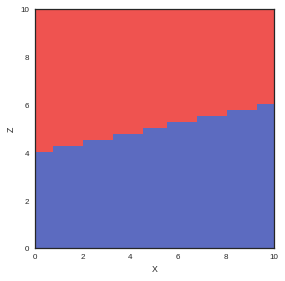

In [60]:
gp.plot_section(geo_data, sol[0,:], 5)

In [61]:
import theano
import theano.tensor as T
# Theano function
x_1 = T.matrix()
x_2 = T.matrix()

sqd = T.sqrt(T.maximum(
    (x_1 ** 2).sum(1).reshape((x_1.shape[0], 1)) +
    (x_2 ** 2).sum(1).reshape((1, x_2.shape[0])) -
    2 * x_1.dot(x_2.T), 0
))
eu = theano.function([x_1, x_2], sqd, allow_input_downcast=True)

In [62]:
# Create xy meshgrid
res_x = 5
res_y = 5

xy = np.meshgrid(np.linspace(0, 10, res_x),
                 np.linspace(0, 10, res_y))
z = np.ones(res_x*res_y)*10

# Transformation
xy_ravel = np.vstack(map(np.ravel, xy))
airborne_plane = np.vstack((xy_ravel, z)).T

d = eu(geo_data.grid.grid, airborne_plane)
ab_g = geo_data.grid.grid[np.argmin(d, axis=0)]


In [64]:
s = sol[0, :].reshape(40,40,40)

In [65]:
%matplotlib inline

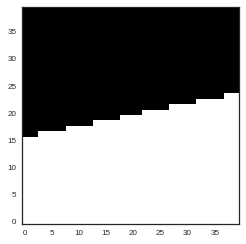

In [66]:
import matplotlib.pyplot as plt
plt.imshow(s[:,0,:].T, origin='lower left')
plt.show()

In [67]:
s_pad = np.pad(s, [(10,10),(10,10),(0,0)], mode='reflect')

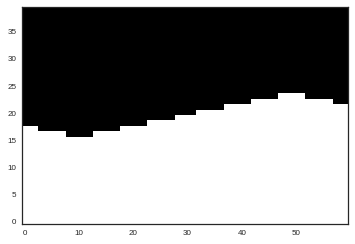

In [68]:
plt.imshow(s_pad[:,0,:].T, origin='lower left')
plt.show()

In [69]:
x_coord_pad = np.ravel(np.pad(geo_data.grid.grid[:,0].reshape(20,20,20), [(10,10),(10,10),(0,0)], mode='reflect'))
y_coord_pad = np.ravel(np.pad(geo_data.grid.grid[:,1].reshape(20,20,20), [(10,10),(10,10),(0,0)], mode='reflect'))
z_coord_pad = np.ravel(np.pad(geo_data.grid.grid[:,2].reshape(20,20,20), [(10,10),(10,10),(0,0)], mode='reflect'))


ValueError: total size of new array must be unchanged

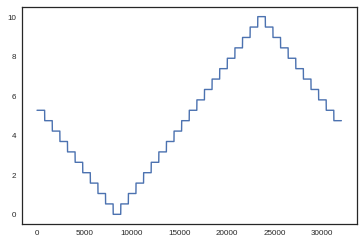

In [70]:
plt.plot(x_coord_pad)

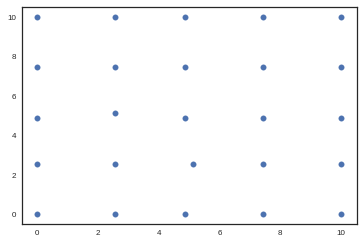

In [71]:
plt.scatter(ab_g[:, 0], ab_g[:, 1])

In [72]:
ab_g

array([[  0.        ,   0.        ,  10.        ],
       [  2.56410265,   0.        ,  10.        ],
       [  4.8717947 ,   0.        ,  10.        ],
       [  7.43589735,   0.        ,  10.        ],
       [ 10.        ,   0.        ,  10.        ],
       [  0.        ,   2.56410265,  10.        ],
       [  2.56410265,   2.56410265,  10.        ],
       [  5.1282053 ,   2.56410265,  10.        ],
       [  7.43589735,   2.56410265,  10.        ],
       [ 10.        ,   2.56410265,  10.        ],
       [  0.        ,   4.8717947 ,  10.        ],
       [  2.56410265,   5.1282053 ,  10.        ],
       [  4.8717947 ,   4.8717947 ,  10.        ],
       [  7.43589735,   4.8717947 ,  10.        ],
       [ 10.        ,   4.8717947 ,  10.        ],
       [  0.        ,   7.43589735,  10.        ],
       [  2.56410265,   7.43589735,  10.        ],
       [  4.8717947 ,   7.43589735,  10.        ],
       [  7.43589735,   7.43589735,  10.        ],
       [ 10.        ,   7.43589

In [73]:
coord_pad = np.vstack((x_coord_pad, y_coord_pad, z_coord_pad)).T

In [74]:
dist = eu(coord_pad, ab_g)

In [75]:
dist.shape

(32000, 25)

In [76]:

z_d = z_coord_pad.reshape(-1,1)-ab_g[:,2]

In [77]:
z_d.shape

(32000, 25)

In [78]:
dens = np.tile(np.ravel(s_pad).reshape(-1,1), (1,25)) +1

In [79]:
grav = dens * z_d / (dist**3)

ValueError: operands could not be broadcast together with shapes (144000,25) (32000,25) 

In [80]:

gr = np.nan_to_num(grav).sum(axis=0)

In [81]:
import matplotlib.pyplot as plt


In [82]:
plt.imshow(gr.reshape(5,5))

AttributeError: 'function' object has no attribute 'reshape'

In [83]:
def grav(n, rho, x, y, z, x_m, y_m, z_m):
    g = 0
    for j in range(n):
        for k in range(n):
            for l in range(n):
                g += rho[j,k,l] * np.abs(z[l] - z_m) / ((x[j] - x_m)**2 + (y[k] - y_m)**2 + (z[l] - z_m)**2)**(3/2)
    return g

In [111]:
# set according to previous result.
rho = sol[0,:].reshape((40,40,40))

In [112]:
x = np.linspace(1,0.,40)
y = np.linspace(1,0.,40)
z = np.linspace(-1,0.,40)

In [113]:
x_m, y_m, z_m = 0.55, 0., 0.

In [114]:
grav(20, rho, x, y, z, x_m, y_m, z_m)

518.54290151165526

In [115]:
x.shape, y.shape, z.shape, rho.shape

((40,), (40,), (40,), (40, 40, 40))

In [116]:
n_meas = 20
x_m = np.linspace(0.4,0.6,n_meas)
y_m = np.linspace(0.4,0.6,n_meas)

X,Y = np.meshgrid(x_m,y_m)

In [117]:
grav_all = np.empty_like(X)


for i in range(n_meas):
    for j in range(n_meas):
        grav_all[i,j] = grav(40, rho, x, y, z, X[i,j], Y[i,j], z_m)



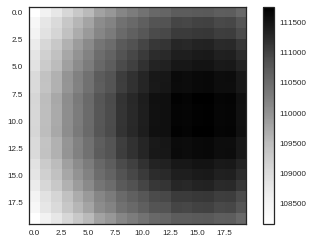

In [118]:
plt.imshow(grav_all)
plt.colorbar()

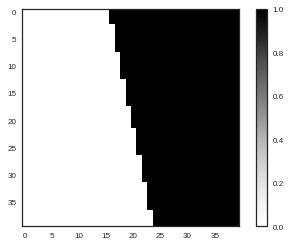

In [103]:
plt.imshow(rho[:,0,:])
plt.colorbar()

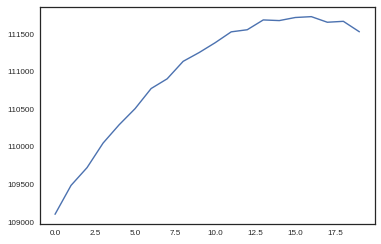

In [108]:
plt.plot(grav_all[10, :])

## And now: reproduce in vectorised form

In [155]:
def grav(n, rho, x, y, z, x_m, y_m, z_m):
    g = 0
    for j in range(n):
        for k in range(n):
            for l in range(n):
                g += rho[j,k,l] * np.abs(z[l] - z_m) / ((x[j] - x_m)**2 + (y[k] - y_m)**2 + (z[l] - z_m)**2)**(3/2)
    return g

In [156]:
def grav_vec(n, rho, x, y, z, x_m, y_m, z_m):
    g = 0
    
    
    
    
    

In [157]:
X, Y, Z = np.meshgrid(x, y, z)

In [161]:
x_m, y_m, z_m = 0.55, 0.5, 0.
g = np.sum(rho * np.abs(Z - z_m) / ((X - x_m)**2 + (Y - y_m)**2 + (Z - z_m)**2)**(3/2))

In [162]:
g

111040.07222714742

In [163]:
grav(40, rho, x, y, z, x_m, y_m, z_m)

111650.28943923992

In [164]:
X.shape

(40, 40, 40)

In [ ]:
    for aa in range(2):
        for bb in range(2):
            for cc in range(2):

                r = (
                        dx[:, aa] ** 2 +
                        dy[:, bb] ** 2 +
                        dz[:, cc] ** 2
                    ) ** (0.50)

                tx = tx - NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                    dy[:, bb] * np.log(dz[:, cc] + r) +
                    dz[:, cc] * np.log(dy[:, bb] + r) -
                    dx[:, aa] * np.arctan(dy[:, bb] * dz[:, cc] /
                                          (dx[:, aa] * r)))

                ty = ty - NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                    dx[:, aa] * np.log(dz[:, cc] + r) +
                    dz[:, cc] * np.log(dx[:, aa] + r) -
                    dy[:, bb] * np.arctan(dx[:, aa] * dz[:, cc] /
                                          (dy[:, bb] * r)))

                tz = tz - NewtG * (-1) ** aa * (-1) ** bb * (-1) ** cc * (
                    dx[:, aa] * np.log(dy[:, bb] + r) +
                    dy[:, bb] * np.log(dx[:, aa] + r) -
                    dz[:, cc] * np.arctan(dx[:, aa] * dy[:, bb] /
                                          (dz[:, cc] * r)))

In [165]:
np.arctan(10000000000)

1.5707963266948965